In [47]:
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 10.1.3 퍼셉트론
- 가중치 값(z=w1x1+w2x2+...+wnxn=W.T.dot(X))을 계산한뒤 계단함수를 적용하여 결과를 출력

In [48]:
import numpy as numpy
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)] # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])

In [49]:
y_pred

array([1])

그림 저장: perceptron_iris_plot


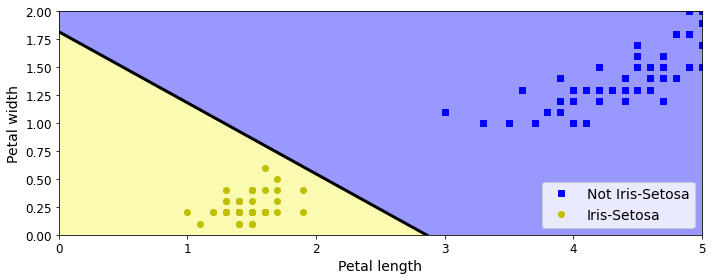

In [50]:

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

활성화 함수

In [51]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f,z,eps=0.000001):
    return (f(z+eps)-f(z-eps)) / (2 * eps)

그림 저장: activation_functions_plot


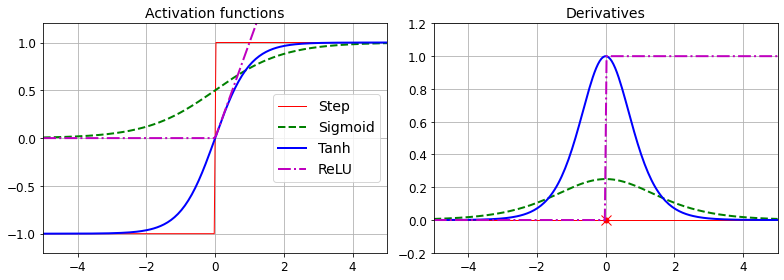

In [52]:

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

배타적 논리합(XOR)문제 해결

In [53]:
def heaviside(z):
    return (z>=0).astype(z.dtype)

def mlp_xor(x1,x2, activation=heaviside):
    return activation(-activation(x1+x2-1.5) + activation(x1+x2-0.5)-0.5)

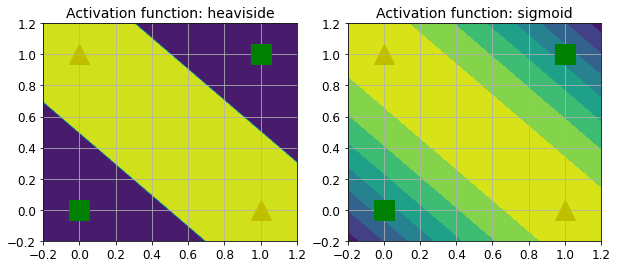

In [54]:

x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# 10.2 케라스로 다층 퍼셉트론 구현하기 

In [55]:
tf.__version__

'2.3.0'

In [56]:
from tensorflow import keras
keras.__version__

'2.4.0'

## 10.2.2 Sequential API를 사용하여 이미지 분류기 만들기

In [57]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [58]:
X_train_full.shape

(60000, 28, 28)

validation set 생성

In [59]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:] 
X_test = X_test / 255.0

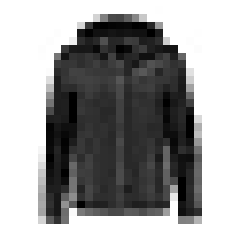

In [60]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [61]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [62]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [63]:
class_names[y_train[0]]

'Coat'

In [64]:
X_valid.shape

(5000, 28, 28)

In [65]:
X_test.shape

(10000, 28, 28)

그림 저장: fashion_mnist_plot


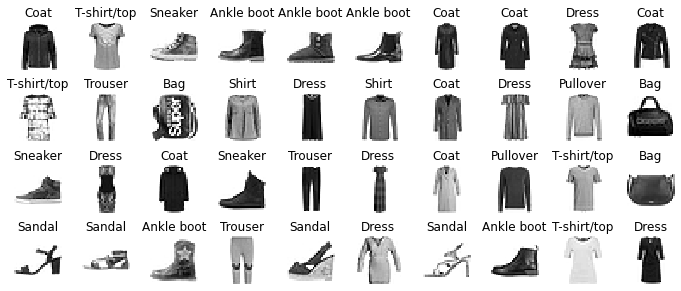

In [66]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

### Sequential API로 모델생성

In [67]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [68]:
model.layers

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [70]:
keras.utils.plot_model(model, "my_Fashion_mnist_model.png", show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [71]:
hidden1 = model.layers[1]
hidden1

In [72]:
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

In [73]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [74]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 933us/step - loss: 0.7252 - accuracy: 0.7606 - val_loss: 0.5228 - val_accuracy: 0.8258
Epoch 2/30
1719/1719 [==============================] - 1s 855us/step - loss: 0.4915 - accuracy: 0.8277 - val_loss: 0.4392 - val_accuracy: 0.8498
Epoch 3/30
1719/1719 [==============================] - 1s 859us/step - loss: 0.4444 - accuracy: 0.8430 - val_loss: 0.5165 - val_accuracy: 0.8082
Epoch 4/30
1719/1719 [==============================] - 2s 881us/step - loss: 0.4175 - accuracy: 0.8538 - val_loss: 0.3976 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 1s 861us/step - loss: 0.3985 - accuracy: 0.8606 - val_loss: 0.3823 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 1s 849us/step - loss: 0.3803 - accuracy: 0.8659 - val_loss: 0.3754 - val_accuracy: 0.8716
Epoch 7/30
1719/1719 [==============================] - 2s 873us/step - loss: 0.3681 - accuracy: 0.8699 - val_loss: 0.3678 -

In [75]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

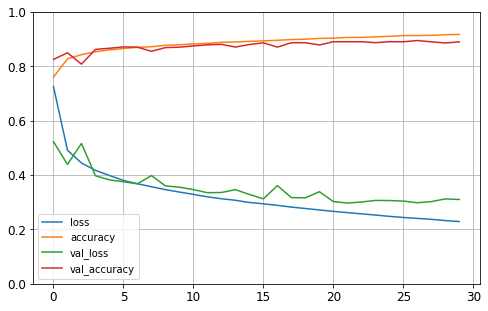

In [76]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

evaluate()를 사용하여 일반화 오차 추정

In [77]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 834us/step - loss: 0.3467 - accuracy: 0.8784


[0.3467342257499695, 0.8784000277519226]

In [78]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [79]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

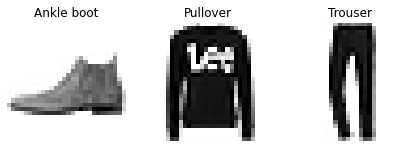

In [80]:
plt.figure(figsize=(7.2,2.4))
for index, image in enumerate(X_new):
    plt.subplot(1,3,index+1)
    plt.imshow(image,cmap="binary",interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 10.2.3 Sequential API를 사용해 회귀용 다층 퍼셉트론 만들기

In [81]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [82]:
np.random.seed(42)
tf.random.set_seed(42)

In [83]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd", validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

TypeError: Invalid keyword argument(s) in `compile`: {'validation_data'}

In [89]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13197982451803051562]

In [87]:
tf.test.is_gpu_available()

False

In [ ]:
""